In [723]:
import pandas as pd
import pycountry
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path

In [724]:
dfolder = 'data/'

In [725]:
df = pd.read_csv(dfolder + 'merged.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/446111836.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dfolder + 'merged.csv')


In [726]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [727]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [728]:
df = df[df['year'] != 1920]
df = df[df['year'] >= 1989]

In [729]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [730]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6', 'count_events_7', 'count_events_8', 'count_events_9',
       'count_events_10', 'count_events_11', 'count_events_12',
       'count_events_13', 'count_events_14', 'count_events_15',
       'count_events_16', 'count_events_17', 'count_events_18',
       'count_events_19', 'count_events_20', 'count_events_1_gov',
       'count_events_2_gov', 'count_events_3_gov', 'count_events_4_gov',
       'count_events_5_gov', 'count_events_6_gov', 'count_events_7_gov',
       'count_events_8_gov', 'count_events_9_gov', 'count_events_10_gov',
       'count_events_11_gov', 'count_events_12_gov', 'count_events_13_gov',
       'count_events_14_gov', 'count_events_15_gov', 'count_events_16_gov',
       'count_events_17_gov', 'count_events_18_gov', 'count_events_19_gov',
       'count_events_20_gov', 'count_events_1_opp', 'count_events_2_o

In [731]:
cols = ['country', 'deaths', 'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']
for col in cols:
    pct_missing = df[col].isnull().sum() * 100 / len(df)
    print(f'{col}: {pct_missing}%')


country: 85.76270820514482%
deaths: 85.76270820514482%
state_deaths: 85.76270820514482%
nonstate_deaths: 85.76270820514482%
onesided_deaths: 85.76270820514482%
civilian_deaths: 85.76270820514482%


In [732]:
df_no_nan_country = df[df['country'].notna()]
df_no_nan_country

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23705,198901,COL,1,1989,54.0,30.0,44.0,180.0,42.0,4.0,...,0.0,14.0,4.0,0.0,Colombia,9.0,9.0,0.0,0.0,0.0
23722,198901,ETH,1,1989,36.0,52.0,74.0,254.0,76.0,12.0,...,0.0,4.0,2.0,0.0,Ethiopia,2716.0,2716.0,0.0,0.0,0.0
23728,198901,GBR,1,1989,1030.0,350.0,444.0,1522.0,360.0,94.0,...,6.0,0.0,0.0,0.0,United Kingdom,3.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115802,202303,THA,3,2023,2554.0,1570.0,1626.0,6782.0,1834.0,700.0,...,32.0,2.0,34.0,0.0,Thailand,2.0,2.0,0.0,0.0,0.0
115810,202303,TUR,3,2023,5276.0,2946.0,4304.0,14786.0,5360.0,1374.0,...,32.0,18.0,38.0,0.0,Turkey,1.0,1.0,0.0,0.0,0.0
115814,202303,UGA,3,2023,2102.0,1256.0,1160.0,3526.0,1514.0,380.0,...,14.0,8.0,30.0,0.0,Uganda,1.0,0.0,0.0,1.0,1.0
115815,202303,UKR,3,2023,25644.0,12548.0,14472.0,49040.0,16670.0,5434.0,...,112.0,42.0,124.0,0.0,Ukraine,829.0,829.0,0.0,0.0,170.0


In [733]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [734]:
df['nonstate_deaths'].fillna(0, inplace=True)
df['onesided_deaths'].fillna(0, inplace=True)
df['civilian_deaths'].fillna(0, inplace=True)
df['deaths'].fillna(0, inplace=True)
df['state_deaths'].fillna(0, inplace=True)


In [735]:
df.MonthYear.dtype
df.year.dtype
df.month.dtype

dtype('int64')

In [736]:
# dataFrame with all possible MonthYear for each isocode
all_dates = pd.date_range(start='1989-01-01', end='2023-05-01', freq='M')
all_isocodes = df['isocode'].unique()

# each isocode with a full range of dates
dfs = [pd.DataFrame(data={'MonthYear': (all_dates.year*100 + all_dates.month).astype(int), 
                          'year': all_dates.year, 
                          'month': all_dates.month, 
                          'isocode': iso}) for iso in all_isocodes]

# concatenation
full_df = pd.concat(dfs)

# merge
merged_df = pd.merge(full_df, df, on=['MonthYear', 'isocode', 'month', 'year'], how='left')

# fill missing values 
merged_df.fillna(0, inplace=True)


In [737]:
def get_country_name(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None

merged_df['country'] = merged_df['isocode'].apply(get_country_name)

In [738]:
merged_df

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901,1989,1,AFG,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
1,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0
2,198903,1989,3,AFG,546.0,274.0,206.0,1148.0,370.0,104.0,...,16.0,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0
3,198904,1989,4,AFG,364.0,262.0,182.0,976.0,290.0,68.0,...,10.0,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0
4,198905,1989,5,AFG,312.0,150.0,156.0,706.0,190.0,20.0,...,0.0,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98875,202212,2022,12,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98876,202301,2023,1,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98877,202302,2023,2,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98878,202303,2023,3,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0


Every country isocode has the correct number of months in MonthYear. No months are missing.
For every country, the months are in ascending order, meaning the data for each isocode is ordered correctly by time.


In [739]:
# Check for any missing months
num_months = len(pd.date_range(start='1989-01-01', end='2023-05-01', freq='M'))
month_counts = merged_df.groupby('isocode')['MonthYear'].nunique()
assert month_counts.min() == num_months, "Some countries have missing months"

# Check if months are in ascending order
is_monotonic = merged_df.groupby('isocode')['MonthYear'].apply(lambda x: x.is_monotonic_increasing)
assert is_monotonic.all(), "Some countries have months not in ascending order"


In [740]:
num_months

412

In [741]:
is_monotonic

isocode
ABW    True
AFG    True
AGO    True
AIA    True
ALB    True
       ... 
XKX    True
YEM    True
ZAF    True
ZMB    True
ZWE    True
Name: MonthYear, Length: 240, dtype: bool

In [742]:
df = merged_df

In [743]:
df.describe()

,MonthYear,year,month,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_16_opp,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
count,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,9.888000e+04,98880.000000,98880.000000,98880.000000,...,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000,98880.000000
mean,200573.451456,2005.669903,6.461165,2068.443305,1039.662156,1060.373483,3.649687e+03,1152.982625,331.690716,489.264624,...,2.328600,12.247694,10.124676,29.691808,0.131048,26.328226,14.346238,3.152255,8.829733,11.009254
std,991.204812,9.912667,3.459344,17085.524852,9220.106074,8351.826802,2.710631e+04,8928.068631,2498.786606,4693.194150,...,13.215479,74.879832,58.154386,172.593857,1.476337,1676.354656,192.819571,57.456465,1660.507070,1662.199016
min,198901.000000,1989.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199707.750000,1997.000000,3.000000,16.000000,8.000000,10.000000,4.200000e+01,10.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200602.500000,2006.000000,6.000000,158.000000,76.000000,98.000000,3.740000e+02,104.000000,24.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201409.250000,2014.000000,9.000000,758.500000,358.000000,444.000000,1.646000e+03,474.000000,128.000000,156.000000,...,0.000000,4.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202304.000000,2023.000000,12.000000,634448.000000,345500.000000,311928.000000,1.008004e+06,352824.000000,86990.000000,177042.000000,...,852.000000,6644.000000,2370.000000,8722.000000,204.000000,522125.000000,25512.000000,7513.000000,521530.000000,521620.000000


In [744]:
#Stock function from class
def stock_simple(x: pd.Series, decay: float = 0.8):
    # xs is a stock of x inflow with a decay of 0.8
    x = list(x.fillna(0))
    xs = [] 
    for n in range(len(x)):
        if n == 0: 
            xs.append(x[n]) # stock starts in initial value
        else:
            xs.append(x[n] + decay * xs[n-1])
    return xs

#Decimal representation of topic share
columns_to_divide = [col for col in df.columns if col.startswith('count_events_')]

for col in columns_to_divide:
    df[col] = df[col] / 100

#Creating variable conflict
df['conflict'] =  0
df.loc[df['deaths'] >= 10, 'conflict'] = 1 #Threshold: 10 deaths

#Creating stock variables
# List of column prefixes
count_events_prefixes = ['count_events_' + str(i) for i in range(1, 21)]

# List of suffixes
suffixes = ['', '_gov', '_opp']

# Creating stock variables for each column
for prefix in count_events_prefixes:
    for suffix in suffixes:
        col_name = prefix + suffix
        if col_name in df.columns:
            df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
                                       .apply(lambda x: stock_simple(x))
                                       .explode().reset_index(drop=True))


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/151883213.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/151883213.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name + '_stock'] = (df.groupby('isocode')[col_name]
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/151883213.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [745]:
def make_target(df, t):
    # t is the number of periods for the shift

    # loop through each period and generate the shift variables
    for i in range(1, t+1):
        col_name = f'conflict_f{i}'
        df[col_name] = df.groupby('isocode')['conflict'].shift(-i)

    # take the maximum for t periods forward and create the new variable
    df['target_f{}'.format(t)] = df[[f'conflict_f{i}' for i in range(1, t+1)]].max(axis=1, skipna=False)

    # drop the shift variables
    df = df.drop(columns=[f'conflict_f{i}' for i in range(1, t+1)])

    # make the onset variable which ignores periods of ongoing conflict
    df['ons_target_f{}'.format(t)]=df['target_f{}'.format(t)]

    df.loc[df['conflict'] == 1, 'ons_target_f{}'.format(t)] = np.nan
    
    return(df)


In [746]:
df.conflict.nunique()

2

In [747]:
df.columns

Index(['MonthYear', 'year', 'month', 'isocode', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6',
       ...
       'count_events_17_opp_stock', 'count_events_18_stock',
       'count_events_18_gov_stock', 'count_events_18_opp_stock',
       'count_events_19_stock', 'count_events_19_gov_stock',
       'count_events_19_opp_stock', 'count_events_20_stock',
       'count_events_20_gov_stock', 'count_events_20_opp_stock'],
      dtype='object', length=131)

In [748]:
def prepare_slice(count_events, year, month, dep, forward):
    
    data=df
    
    print(dep)
    print('pre drop ', len(data))
    
    #the future data is the data we use to produce the fitted values that are stored
    future = data.drop(data[(data.year != year) | (data.month != month)].index)	
    data = data.drop(data[((data.year > year)) | ((data.year == year) & (data.month >= month))].index)

    #make the target variable through the function above
    data = make_target(data, forward)
    
    print(year)
    print(month)

    #making one model
    fullmodel = []
      
    fullmodel.append('deaths')
    fullmodel.append('state_deaths')
    fullmodel.append('nonstate_deaths')
    fullmodel.append('onesided_deaths')
    fullmodel.append('civilian_deaths')

    for z in range(1, count_events + 1):
        this = 'count_events_' + str(z) + '_stock'
        fullmodel.append(this)
         
    together=[]
    for thang in fullmodel:
        together.append(thang)
        
    together.append('target_f{}'.format(forward))  # use the target variable created in make_target
    together.append('isocode')
    together.append('year')
    together.append('month')

    #model is the full or augmented model
    data2 = data[together]
    df1 = data2.dropna(how='any')
    print('post drop model', len(df1))
    df2 = df1['target_f{}'.format(forward)]  # use the target variable created in make_target
    #dependent variable for full model
    ys = df2.values.ravel()
    
    #now get the model back
    together.remove('target_f{}'.format(forward))  # use the target variable created in make_target
    
    #prepare out of sample for the models
    future2 = future[together]
    future_df1 = future2.dropna(how='any')

    #training data
    X = df1[fullmodel]
    
    #data at time T for producing fitted values
    X_future = future_df1[fullmodel]
    
    return ys, X, X_future, future_df1


In [749]:
gendata=1

for depths in [8]:
    for min_samples_leafs in [100]:
        print(f'Checking forward depth {depths} and minleafs {min_samples_leafs}')

        trees=700
        min_samples_splits=2
        
        forward=3
        count_events=20
        startyearid=2021
        deps=['ons_target_f{}'.format(forward)]

        search=0
        initialize=1

        if initialize==1:
            monthid=1
            #my_file = Path(readin + "forecast_data_forstudents.csv")
            data = df
            future = data.drop(data[(data.year != startyearid) | (data.month != monthid)].index)			
            fittedvalues=['isocode', 'year', 'month']
            fittedframe=future[fittedvalues]

            print(startyearid)
            print(monthid)
            y, X, X_future, future_model = prepare_slice(count_events, startyearid, monthid, deps, forward)

            fittedframe_future_top = future_model[fittedvalues]


Checking forward depth 8 and minleafs 100
2021
1
['ons_target_f3']
pre drop  98880
2021
1
post drop model 91440


In [750]:
X

,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,count_events_1_stock,count_events_2_stock,count_events_3_stock,count_events_4_stock,count_events_5_stock,...,count_events_11_stock,count_events_12_stock,count_events_13_stock,count_events_14_stock,count_events_15_stock,count_events_16_stock,count_events_17_stock,count_events_18_stock,count_events_19_stock,count_events_20_stock
0,693.0,693.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86.0,86.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1720.0,1720.0,0.0,0.0,96.0,0.0,0.0,0.04,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,494.0,494.0,0.0,0.0,86.0,0.0,0.0,0.032,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,454.0,448.0,6.0,0.0,28.0,0.0,0.0,0.0256,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98844,0.0,0.0,0.0,0.0,0.0,254.24422,123.983652,85.603166,357.357262,111.383245,...,109.090804,35.667184,22.082864,15.441513,6.453894,19.576311,81.479521,33.590198,63.583766,0.248842
98845,0.0,0.0,0.0,0.0,0.0,252.715376,120.946921,80.922533,344.44581,108.426596,...,111.952643,37.733747,21.166291,16.93321,5.943115,18.981049,86.043617,34.952158,66.067013,0.199074
98846,0.0,0.0,0.0,0.0,0.0,251.052301,120.037537,78.318026,334.756648,110.361277,...,118.422115,37.326998,23.133033,20.146568,5.994492,18.284839,95.834893,34.061727,63.47361,0.479259
98847,0.0,0.0,0.0,0.0,0.0,250.44184,123.87003,76.674421,331.625318,110.029021,...,130.677692,38.681598,22.866427,22.777255,5.595594,18.847871,105.747915,34.789381,63.918888,0.503407


In [751]:
future_model

,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,count_events_1_stock,count_events_2_stock,count_events_3_stock,count_events_4_stock,count_events_5_stock,...,count_events_14_stock,count_events_15_stock,count_events_16_stock,count_events_17_stock,count_events_18_stock,count_events_19_stock,count_events_20_stock,isocode,year,month
384,2698.0,2661.0,7.0,30.0,97.0,2.55327,2.26015,3.006204,7.123568,1.634381,...,0.06975,0.013976,0.166591,0.560917,0.08903,0.413295,0.0,AFG,2021,1
796,10.0,0.0,0.0,10.0,10.0,316.583831,128.418244,157.980405,613.543525,215.444964,...,12.76535,13.516217,23.537228,64.250383,72.101046,389.46546,0.848317,AGO,2021,1
1208,0.0,0.0,0.0,0.0,0.0,23.287082,12.337394,14.541243,44.660101,18.503907,...,1.676403,0.352192,1.607532,10.063562,1.308846,6.828473,0.051495,ALB,2021,1
1620,0.0,0.0,0.0,0.0,0.0,1.273687,1.882802,0.685892,3.964309,1.221665,...,0.046503,0.000234,0.075898,0.23186,0.031307,0.130018,0.0,ARE,2021,1
2032,0.0,0.0,0.0,0.0,0.0,15.676086,9.103214,10.929625,38.625226,15.833985,...,2.617768,0.249245,1.885793,9.144186,1.623906,7.92015,0.245607,ARG,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97204,0.0,0.0,0.0,0.0,0.0,7.635847,4.579054,6.688316,18.351934,13.394292,...,0.492964,0.518602,1.095815,3.925496,0.715359,4.061696,0.253523,IMN,2021,1
97616,0.0,0.0,0.0,0.0,0.0,82.143732,38.73541,25.189862,111.575032,52.536066,...,5.590504,2.532039,9.535923,16.631164,11.226979,82.07727,0.264768,WLF,2021,1
98028,0.0,0.0,0.0,0.0,0.0,663.376686,330.906801,252.995526,930.371407,302.859159,...,56.815463,10.703857,33.162289,240.017891,67.801054,280.362932,0.874608,IOT,2021,1
98440,0.0,0.0,0.0,0.0,0.0,62.16251,36.865747,21.247873,76.699716,37.072686,...,1.874908,0.900336,2.738936,15.679526,2.890137,11.531067,0.050126,BVT,2021,1


In [752]:
def runsearch(Xs, ys):   
    print("going in")

    model = RandomForestClassifier()
    parameters = {'max_depth'         : [4, 8],
                  'min_samples_leaf'    : [50, 100],
                  'n_estimators': [700]}

    grid = GridSearchCV(return_train_score=True, estimator=model, param_grid = parameters, cv = 3, n_jobs=-1, scoring='roc_auc', verbose=2)
    grid.fit(Xs, ys)

    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.cv_results_)
    
    clf=RandomForestClassifier(**grid.best_params_)
    
    return clf

In [753]:
def setparams(treenumber, depthnumber, min_samples_number, min_samples_leaf_number):  
    print("setting parameters")
    print("they are:", treenumber, depthnumber, min_samples_number, min_samples_leaf_number)
    
    clf=RandomForestClassifier(n_estimators=treenumber,  max_depth =depthnumber, 
                               min_samples_split =min_samples_number, min_samples_leaf =  min_samples_leaf_number
                             ,n_jobs=8)
    return clf

In [754]:
gendata=1

depths = 8
trees = 700
min_samples_splits = 2
min_samples_leafs = 100
forward = 3
startyearid = 2021
deps = ['ons_target_f{}'.format(forward)]
initialize = 1
search = 0

# Initialize an empty dataframe for storing fitted values
fittedvalues=['isocode', 'year', 'month']
fittedframe = pd.DataFrame(columns=['isocode','year','month'])

for yearid in range(startyearid, 2024):
    if yearid<2023:
        maxmonth = 13
        print("before 2023, going till", maxmonth)
    else:
        maxmonth = 4
        print("in 2023, going till", maxmonth)

    for monthid in range(1, maxmonth):
        print(yearid)
        print(monthid)

        y, X, X_future, future_model = prepare_slice(count_events, yearid, monthid, deps, forward)
        fittedframe_future = future_model[fittedvalues]
        
        # Perform grid search or set parameters directly
        if search == 1:
            print("entering search")
            clf = runsearch(X, y)
        else:
            clf = setparams(trees, depths, min_samples_splits, min_samples_leafs)

        # Fit the model and make predictions
        clf.fit(X, y)
        res = clf.predict_proba(X_future)
        fittedframe_future[deps[0]+'_pred'] = res[:, 1]

        # Append the predictions to the fittedframe
        fittedframe = pd.concat([fittedframe, fittedframe_future])

gendata = 1
fittedframe.to_csv("{}_predictions.csv".format(deps[0]))


before 2023, going till 13
2021
1
['ons_target_f3']
pre drop  98880
2021
1
post drop model 91440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
2
['ons_target_f3']
pre drop  98880
2021
2
post drop model 91680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
3
['ons_target_f3']
pre drop  98880
2021
3
post drop model 91920
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
4
['ons_target_f3']
pre drop  98880
2021
4
post drop model 92160
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
5
['ons_target_f3']
pre drop  98880
2021
5
post drop model 92400
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
6
['ons_target_f3']
pre drop  98880
2021
6
post drop model 92640
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
7
['ons_target_f3']
pre drop  98880
2021
7
post drop model 92880
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
8
['ons_target_f3']
pre drop  98880
2021
8
post drop model 93120
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
9
['ons_target_f3']
pre drop  98880
2021
9
post drop model 93360
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
10
['ons_target_f3']
pre drop  98880
2021
10
post drop model 93600
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
11
['ons_target_f3']
pre drop  98880
2021
11
post drop model 93840
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2021
12
['ons_target_f3']
pre drop  98880
2021
12
post drop model 94080
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


before 2023, going till 13
2022
1
['ons_target_f3']
pre drop  98880
2022
1
post drop model 94320
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
2
['ons_target_f3']
pre drop  98880
2022
2
post drop model 94560
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
3
['ons_target_f3']
pre drop  98880
2022
3
post drop model 94800
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
4
['ons_target_f3']
pre drop  98880
2022
4
post drop model 95040
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
5
['ons_target_f3']
pre drop  98880
2022
5
post drop model 95280
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
6
['ons_target_f3']
pre drop  98880
2022
6
post drop model 95520
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
7
['ons_target_f3']
pre drop  98880
2022
7
post drop model 95760
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
8
['ons_target_f3']
pre drop  98880
2022
8
post drop model 96000
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
9
['ons_target_f3']
pre drop  98880
2022
9
post drop model 96240
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
10
['ons_target_f3']
pre drop  98880
2022
10
post drop model 96480
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
11
['ons_target_f3']
pre drop  98880
2022
11
post drop model 96720
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2022
12
['ons_target_f3']
pre drop  98880
2022
12
post drop model 96960
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


in 2023, going till 4
2023
1
['ons_target_f3']
pre drop  98880
2023
1
post drop model 97200
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
2
['ons_target_f3']
pre drop  98880
2023
2
post drop model 97440
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


2023
3
['ons_target_f3']
pre drop  98880
2023
3
post drop model 97680
setting parameters
they are: 700 8 2 100


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_93000/3219656082.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fittedframe_future[deps[0]+'_pred'] = res[:, 1]


In [755]:
data = df

for deps in [['ons_target_f{}'.format(forward)]]:
    
    my_file = Path("{}_predictions.csv".format(deps[0]))

    predictions = pd.read_table(my_file, sep=',').iloc[:, 1:]

    # Select only rows where the prediction is not NaN
    fittedvalues = predictions.dropna(subset=['{}_pred'.format(deps[0])])

    # Merge the predictions into the original dataframe
    data = data.merge(fittedvalues, how='left', on=['isocode', 'year', 'month'])

# Add dependent variables again
combined = make_target(data, forward)
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98880 entries, 0 to 98879
Columns: 134 entries, MonthYear to ons_target_f3
dtypes: float64(68), int64(4), object(62)
memory usage: 101.8+ MB


In [756]:
combined.ons_target_f3

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
98875    0.0
98876    0.0
98877    NaN
98878    NaN
98879    NaN
Name: ons_target_f3, Length: 98880, dtype: float64

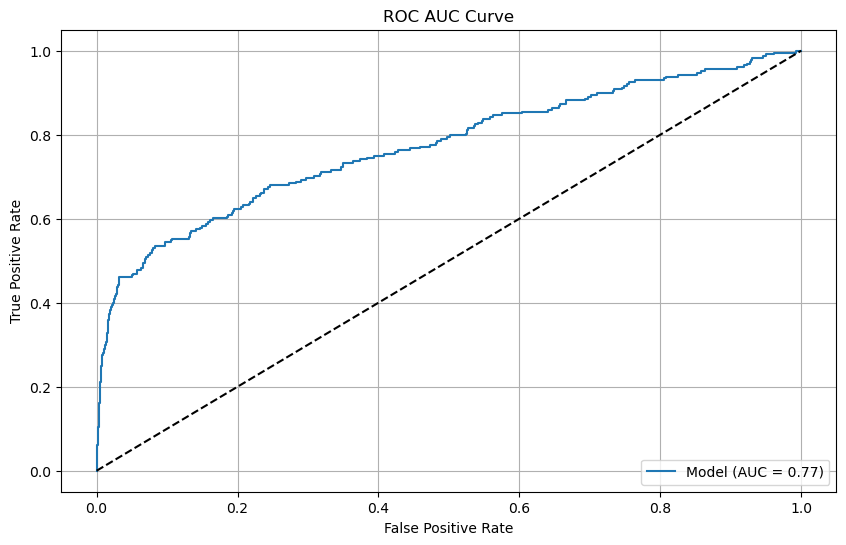

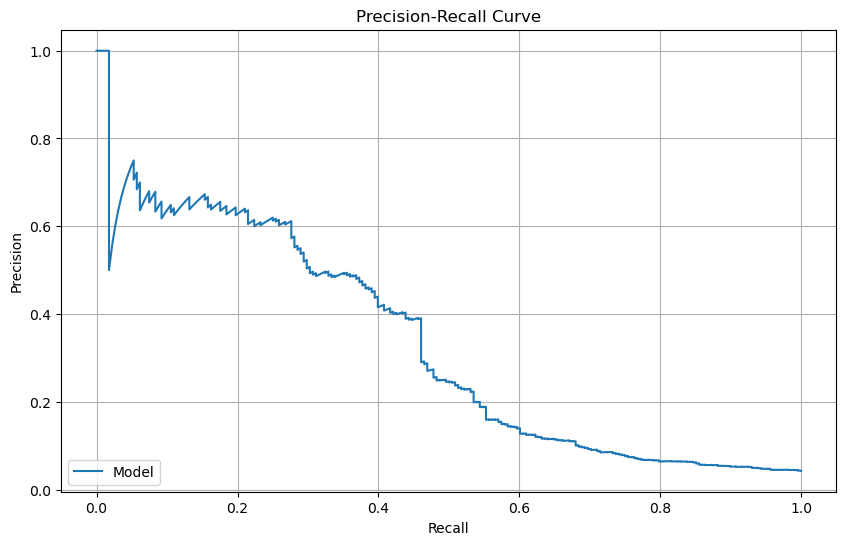

In [757]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# True labels (y_true)
y_true = combined['ons_target_f3']

# Predictions from your model
y_pred = combined['ons_target_f3_pred']

# Filter out rows with missing values
valid_indices = np.logical_not(np.isnan(y_true) | np.isnan(y_pred))
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]

# Calculate ROC AUC scores
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Plot ROC AUC curves
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [758]:
y_pred

397      0.624269
408      0.030100
797      0.019124
798      0.019028
799      0.023991
           ...   
98872    0.017758
98873    0.017386
98874    0.018222
98875    0.019242
98876    0.018854
Name: ons_target_f3_pred, Length: 5324, dtype: float64